# Limpieza de cadena de ADN

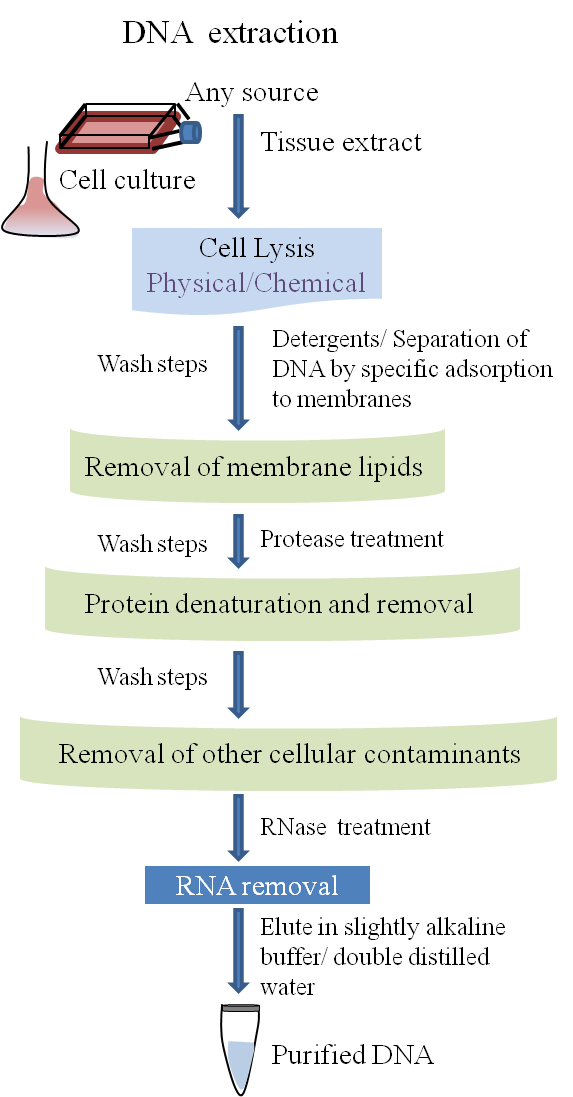

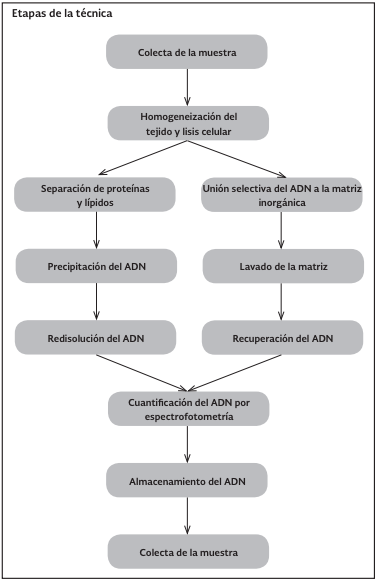

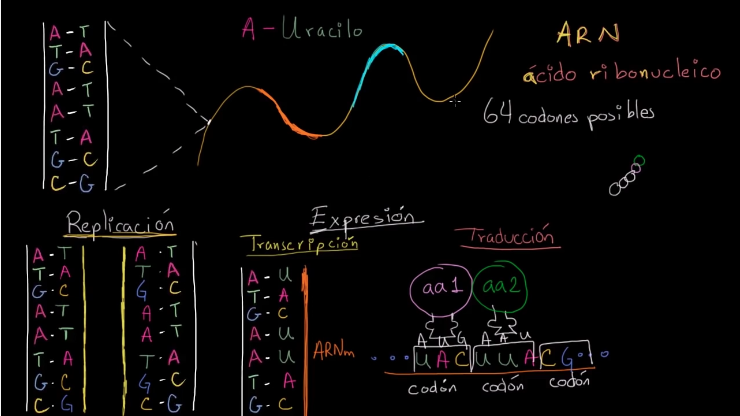

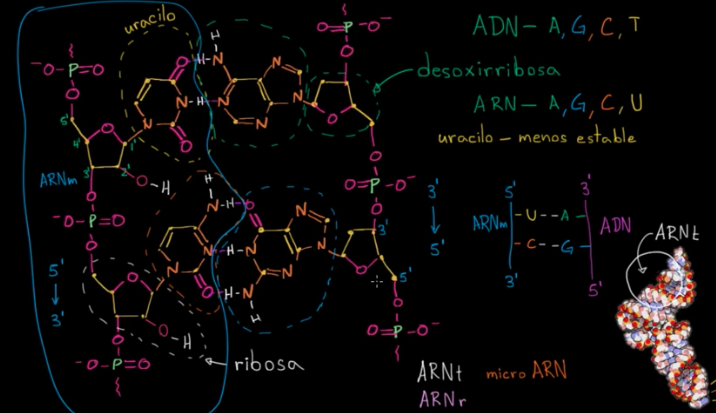

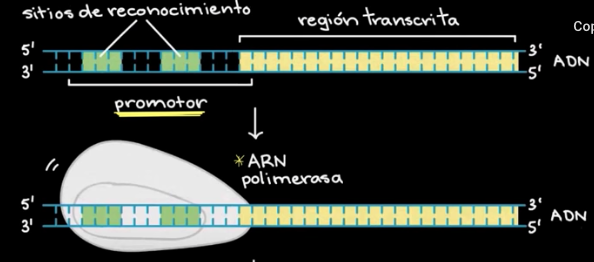

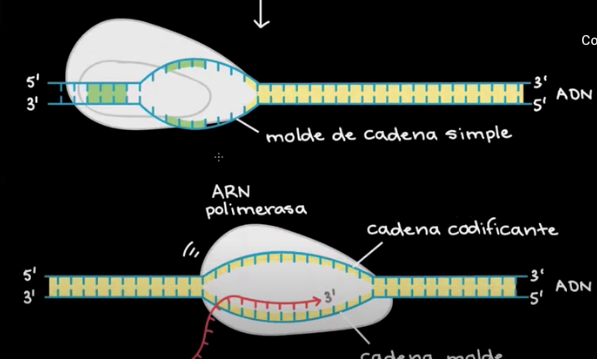

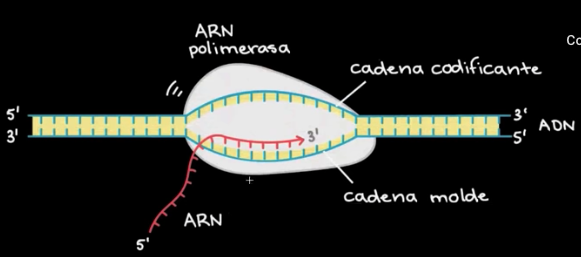

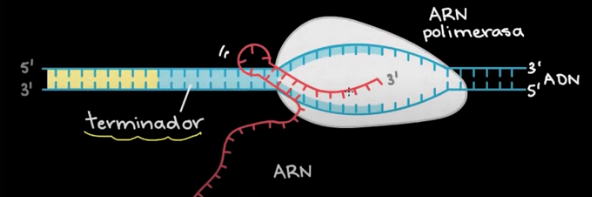

# Codones de Inicio y parada

In [18]:
Cadena1 = "GCAGTTCCGCCTCAAGTTTGGTCTGGTGCATCGTCAACGAGCTGACCTGCCGCTTGAGCACCTGCATCCGCGTGGTGGTCACCACTGAACGCACATCTGGTACAACGGCCTCCGAGAATATCTCGTTAATCAGGCGATGGTTGTGCAGATAGCGGGCGTAGGCCAAGTGCTTGGTCGTATACCCTTCGTCCTGGTCATCCTCGTCCTCCGCCGGCTGAATGTCGATGCGTCGCTCATGCTGCGACTTACTGCCGCCACCGCGTGACGGTGTCTCATGCATATCCACGTCGGTCTTCACCTTGCTTTTGGCCGACATGTAGGCCTGATAGGCGGGCGTCTGGTGGTAGGCCTTTAGCGATTTCTCGTACTCCAGCTTCTCCGCCTCGTATTCGTCAATGAACTCCGTCTTCTCATCCTCGGGCAGCAACTTCCACATGGCACCGATCTTCTTACCCAGCTCCCACAGCTTCAGCTCTGGATGCTTCGCCTTGACGCTATCCCAGACGCGTTTCGAATACCGCATGTAGGGCAAAATGGGCTTCTCCGGCGGCTTTGGTGGCTTGGGTAGCCTTGATTCGTTCTGGTTCTTGCTGCTCGACGACTTGGTTACCTTCTGTGGCGTGAATGCCGGATTCCCATAGTTGCTGTGCGTGAAGATGGGCGTCTGATCCTTGTTGCGATCGCCACCACCTCCGCCGCCGGATGAACGCGCGCAGCTGCCGCCGCCGGAGCCACCGCCGCCGCCCTGGAGTGGTGTGGCCGATCCCTGGCCGCCAACGGCTATCTGCTTGTAGTTGCTTGGCAGGGCCATCTTTGTGCAATTCGCTGGTCAAATTTGTATGGATTTTCCAAGAGAAATAACAATTTTCAGACAGACGCCATTTTCTGTCGGCGTTGGTGGAGGTGTGGCCGTACCTGATTCTAAGAAAAATCATATAAACCGGGAATTGGCATATATAGCGGAATATATATGATAAGGAAATAGTAACTGCTAGAGAATATACAAAATTTTAGTTACCTAAAACTAGCAGAACACTTTAGCTGAATTGCTGCTACTTATAAAAAAAATCTGTAACTTCTCATTTTTATTCAGCTTTATAGAAATCAAAAATTATACCACACTAGAATCTAGAAAATACCAACGGCAAATCATTTTCCATTAAGTTGGCAGCCCCGCAACTGGGATTTGTAAAATATAAACAAATCGTAAACAACTAAAAAATGTTTGCCGGTCGTTTGATGGTCCGTTCGATCGTTGGTCGGGCATGCTTGGCCACCATGGGCAGGTGGTCAAAGCCCCAAGCACACGCCAGCCAAGTGATCCTGCCCAGCACACCAGCGATAGCCGCAGTTGCTATTCAATGCGAGGAATTCACTGCCAACCGGCGATTGTTTAGCAGTCAAATTGAGACGGAATCCACATTGGACGGCGCCACCTACGAGCGTGTGTGCTCCGACACCCTGGACGCACTGTGCGACTACTTCGAGGAGCTGACGGAGAACGCCTCCGAGCTGCAGGGCACGGATGTGGCTTACAGCGTAGGTGACATTCGGCTATTACATCATTCCATTGACCTGCTAATCCTCGCGGGGTTTCCGCTTCCACAGGAATGGCGTGCTAACCGTGAACCTGGGAGGACAGCACGGCACCTATGTGATCAACCGGCAGACGCCCAACAAGCAGATCTGGCTCAGTTCGCCCACCAGCGGTCCCAAGCGATACGATTTCGTCGGCACTGTGGCGGCGGGCAGATGGATCTACAAGCACAGTGGTCAGTCGCTGCACGAACTGTTGCAGCAGGAGATACCCGGCATACTGAAGTCACAGTCCGTGGACTTCCTACGCCTGCCCTACTGTAGTTAATTCCGTGATTAGTTTAAATTCTCCTCCATAAAAAGTCGGTTGAAACGTTCGATTTTGATATATTTATTGTTCTTCATCTGTTGGCACAGTGGTCACTCGATATACATGGAACTGCTGCTGCTGCGGATGACCAAAGGTATATACTTATACTTCCCTGGAGCTGTGAAGCTTAGCTTCTGGCATAAATGCTTTGCATTCGCTTATTCATTTATGTACGATTAGTTTTGGTTTCGAAGTTTAAATTTGTTGTTTTTGAGAGGAATAAACTTAAAAATCAGTTGTTTAATGTATAAATCAAATAATAATAATCAAATCACCATTGAAGAACATCATATGTAGCTATACATATTTTATTTTATTTTATTATTTGTCACTTGTACGTTCCATTTCGTTTATTTTTATTTCAATACACAGAATTCAGAACTCAAAGCTCCCCCAGCTAATAATTCCAAACGAAAGTCGATTAAAGTTGATTTCCGGAATTATTGTGTATGTTTATTCACGTGCTCTTCAGATTTATGTTTTCTGAATTCTATTGTTGTTCGGTGTTTTATAAACAAATGAAGGTAGTGATTATTTTCTTTTCTTTTTTTTGGCAGCAGCACACATGTATGGTAAAAAAAAAAAATAACAAAAATCACTTGCCAGCTAGCAAATACACGGGCACTTCAAAGGGCGTTATTCTCGTTTCTACATTACGTTTAAATTGCATAACGTTAATAGTATGGATATCTAAGTCTACGACACTCTAGTGACGTCCACCGAACATGTTGTTAAAGTGCGGCTGCTGCTGCTGCTGCTGCTGCTGGGCACCCATAAA"

In [58]:
# http://www.normalesup.org/~doulcier/teaching/python/Ex02_sequences.html

import pandas as pd
import numpy as np
try:
    import re2 as re
except ImportError:
    import re

def find_all(sequence, pattern='ATG', reading_frame=None, max_hits = None):
    """
    Encuentra todos los indices de patrón en secuencia.
    Args:
        secuencia (cadena): la secuencia para buscar.
        patrón (cadena): el patrón a buscar.
        Reading_frames (int, tuple or None): marco de lectura para verificar, si Ninguno busca en todo el marco de lectura.
        max_hits (int): número máximo de visitas a devolver (todas si ninguna)
    Retorno: (lista) lista de posición en secuencia donde comienza el patrón. 
    """
    hits = []
    L = len(pattern)
    
    # Analiza el valor del argumento reading_frame.
    # Note the Duck-typing. 
    if reading_frame is None: 
        # Si ninguno, todo el marco de lectura
        reading_frame = range(len(pattern))
    try:
        iter(reading_frame)
    except TypeError:
        # Si no es iterable, hágalo iterable.
        reading_frame = (reading_frame,)
    
    for rf in reading_frame:
        for i in range(rf, len(sequence)-L+1, L ):
            if sequence[i:i+L] == pattern:
                hits.append(i)
                if max_hits is not None and len(hits)>=max_hits:
                    break
    return hits

def matching_stop(sequence, start='ATG', stops=('TAA','TAG','TGA')):
    """
    Devuelve la posición de cada codón de inicio y del primer codón de parada siguiente.
    Si no hay un codón de parada después, se ignora el codón de inicio.
    Args:
        secuencia (cadena): la secuencia para buscar.
        inicio (cadena): codón de inicio
        paradas (iter): lista de codones de parada
        
    """
    hits = []
    starts = find_all(sequence=sequence, pattern=start)
    for start in starts:
        stop_hits = []
        for stop in stops:
            for pos in find_all(sequence[start:], stop, reading_frame=0, max_hits=1):
                stop_hits.append(pos)
        if stop_hits:
            hits.append((start, start+np.min(stop_hits)))
    return hits

def matching_stop_table(sequence, start='ATG', stops=('TGA','TAA','TAG')):
    """ Return a pd.Dataframe contenant les ORF d'une sequence.
    Args: 
        sequence (string): the sequence to search into.
        start (string): start codon
        stops (iter): list of stop codons
    Return (pd.dataframe), avec colonnes: start, stop, stop_codon, length
    """
    data = []
    # construire le dataframe ligne par ligne. 
    for begin,end in matching_stop(sequence, start=start, stops=stops):
        data.append({'start':begin, 'end':end, 
                     'stop_codon':sequence[end:end+3]
                    })
    data = pd.DataFrame(data)
    data['length'] = data.end-data.start
    return data


data = matching_stop_table(Cadena1)

print(data)

   start  end stop_codon  length
0      7  124        TAG     117
1     70  124        TAG      54
2    103  124        TAG      21
3    217  226        TGA       9


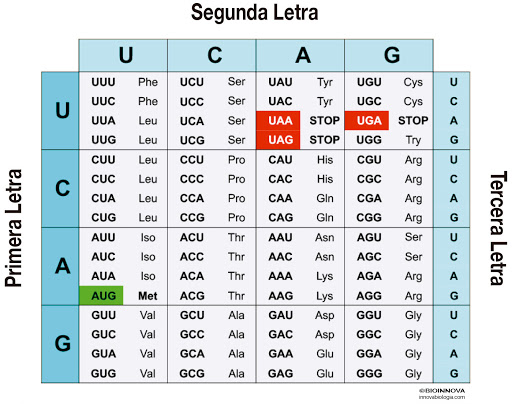

In [5]:
### Copié-collé depuis wikipédia:
data = """
Amino acid 	Codons 	Compressed 		Amino acid 	Codons 	Compressed
Ala / A 	GCU, GCC, GCA, GCG 	GCN 	Leu / L 	UUA, UUG, CUU, CUC, CUA, CUG 	YUR, CUN
Arg / R 	CGU, CGC, CGA, CGG, AGA, AGG 	CGN, MGR 	Lys / K 	AAA, AAG 	AAR
Asn / N 	AAU, AAC 	AAY 	Met / M 	AUG
Asp / D 	GAU, GAC 	GAY 	Phe / F 	UUU, UUC 	UUY
Cys / C 	UGU, UGC 	UGY 	Pro / P 	CCU, CCC, CCA, CCG 	CCN
Gln / Q 	CAA, CAG 	CAR 	Ser / S 	UCU, UCC, UCA, UCG, AGU, AGC 	UCN, AGY
Glu / E 	GAA, GAG 	GAR 	Thr / T 	ACU, ACC, ACA, ACG 	ACN
Gly / G 	GGU, GGC, GGA, GGG 	GGN 	Trp / W 	UGG
His / H 	CAU, CAC 	CAY 	Tyr / Y 	UAU, UAC 	UAY
Ile / I 	AUU, AUC, AUA 	AUH 	Val / V 	GUU, GUC, GUA, GUG 	GUN
START 	AUG 	STOP 	UAA, UGA, UAG 	UAR, URA"""

# On va construire un dictionnaire qui contient la correspondance ARN->Protéines
# C'est l'occasion d'exercer nos regexp. 
code = {}
for line in data.split('\n'):
    for m in re.finditer("[A-Za-z]{3} / ([A-Z]) \t([AUGC, ]*)",line):
        for codon in m.group(2).split(','):
            code[codon.strip()] = m.group(1)

for codon in re.search("STOP \t([AUGC, ]*)", data).group(1).split(','):
    code[codon.strip()] = '*'

assert len(code)==64

# Comme on va ignorer l'étape de transcription, remplaçons les U par des T:
code = {k.replace('U','T'):v for k,v in code.items()}

In [6]:
Cadena1 = "TCACGTTATGCGTTCTCGCCACAGGATACAGAATTTTCATTTCCAAGTTCATCGTCGCGTCGTGGTTACAATGATTTCCCCGGCTGCGGCGGCAGCGGCGGAAATGGTGGGAGTGCCAACAATTTAGGGGGCGGCAACATGTGCCACCTGCCGCCGATGGCCAGCAACAACTCGCTGAATAATCTCTGCGGATTGTCGCTGGGCAGCGGTGGTAGTGATGATCTCATGAACGATCCTCGGGCAAGCAACACCAACCTGATTGTCAACTACTTGCCCCAGGACATGACCGATCGCGAGCTGTACGCCCTATTCAGAGCCATTGGACCCATCAACACGTGCAGAATCATGCGAGACTATAAG"

# Traducción a cadena de aminoaciodos

In [9]:
def traduction(sequence, code, taille_codon=3):
    """
    Traduce la secuencia usando el código.
        secuencia (string): La secuencia a traducir.
        codigo (dict): codon de correspondencia-> traduccion.
        taille_codon (int): el tamaño de un codón.
    Devuelve la secuencia traducida (string) Se ignoran los codones incompletos (*). 
    """
    return ''.join(code[sequence[i:i+taille_codon]] 
                   for i in 
                   range(0,taille_codon*(len(sequence)//taille_codon),taille_codon))


def traduire_orf(sequence, code, taille_codon=3, start='ATG', stops=('TAA','TAG','TGA')):
    """
    Encuentra y traduce ORF.
        secuencia (string): La secuencia a traducir.
         codigo (dict): codon de correspondencia-> traduccion.
         taille_codon (int): el tamaño de un codón.
         start (string): codón de inicio
         stops (iter): lista de codones de parada
     Devuelve las proteínas en forma de lista.
     """
    orf = matching_stop(sequence, start=start, stops=stops)
    return [traduction(sequence[o[0]:o[1]], code, taille_codon) for o in orf]

print("Lista de proteinas:")
print(traduire_orf(Cadena1, code))
print("Cadena:")
print(traduction(Cadena1, code))

Lista de proteinas:
['MRSRHRIQNFHFQVHRRVVVTMISPAAAAAAEMVGVPTI', 'MISPAAAAAAEMVGVPTI', 'MVGVPTI', 'MIS']
Cadena:
SRYAFSPQDTEFSFPSSSSRRGYNDFPGCGGSGGNGGSANNLGGGNMCHLPPMASNNSLNNLCGLSLGSGGSDDLMNDPRASNTNLIVNYLPQDMTDRELYALFRAIGPINTCRIMRDYK


# Ensamblaje de la cadena

In [4]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
coding_dna = Seq(Cadena1, IUPAC.unambiguous_dna)
print(coding_dna.translate())


AVPPQVWSGASSTS*PAA*APASAWWSPLNAHLVQRPPRISR*SGDGCADSGRRPSAWSYTLRPGHPRPPPAECRCVAHAATYCRHRVTVSHAYPRRSSPCFWPTCRPDRRASGGRPLAISRTPASPPRIRQ*TPSSHPRAATSTWHRSSYPAPTASALDASP*RYPRRVSNTACRAKWASPAALVAWVALIRSGSCCSTTWLPSVA*MPDSHSCCA*RWASDPCCDRHHLRRRMNARSCRRRSHRRRPGVVWPIPGRQRLSACSCLAGPSLCNSLVKFVWIFQEK*QFSDRRHFLSALVEVWPYLILRKII*TGNWHI*RNIYDKEIVTAREYTKF*LPKTSRTL*LNCCYL*KKSVTSHFYSAL*KSKIIPH*NLENTNGKSFSIKLAAPQLGFVKYKQIVNN*KMFAGRLMVRSIVGRACLATMGRWSKPQAHASQVILPSTPAIAAVAIQCEEFTANRRLFSSQIETESTLDGATYERVCSDTLDALCDYFEELTENASELQGTDVAYSVGDIRLLHHSIDLLILAGFPLPQEWRANREPGRTARHLCDQPADAQQADLAQFAHQRSQAIRFRRHCGGGQMDLQAQWSVAARTVAAGDTRHTEVTVRGLPTPALL*LIP*LV*ILLHKKSVETFDFDIFIVLHLLAQWSLDIHGTAAAADDQRYILILPWSCEA*LLA*MLCIRLFIYVRLVLVSKFKFVVFERNKLKNQLFNV*IK***SNHH*RTSYVAIHILFYFIICHLYVPFRLFLFQYTEFRTQSSPS**FQTKVD*S*FPELLCMFIHVLFRFMFSEFYCCSVFYKQMKVVIIFFSFFWQQHTCMVKKKNNKNHLPASKYTGTSKGVILVSTLRLNCITLIVWISKSTTL**RPPNMLLKCGCCCCCCCWAPI


/Users/hahn/Documents/Universidad/Modelaje y Análisis de sistemas Biológicos/Modelo_de_enfermedad/.env/lib/python3.8/site-packages/Bio/Seq.py:2855: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


# Modelos Ocultos de Markov

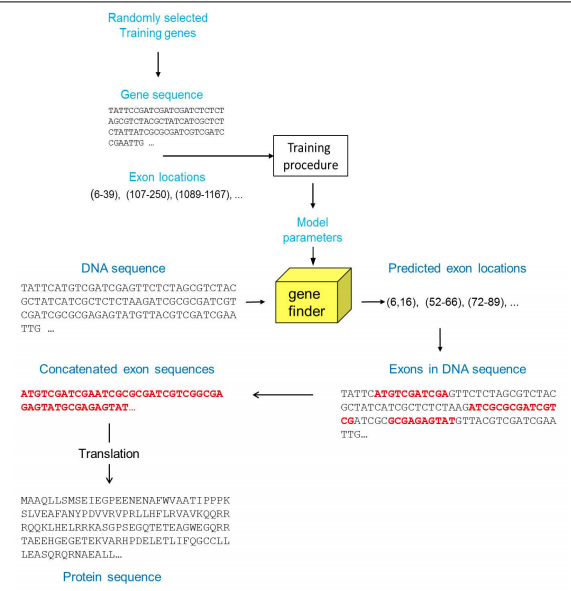

# HMM viterbi

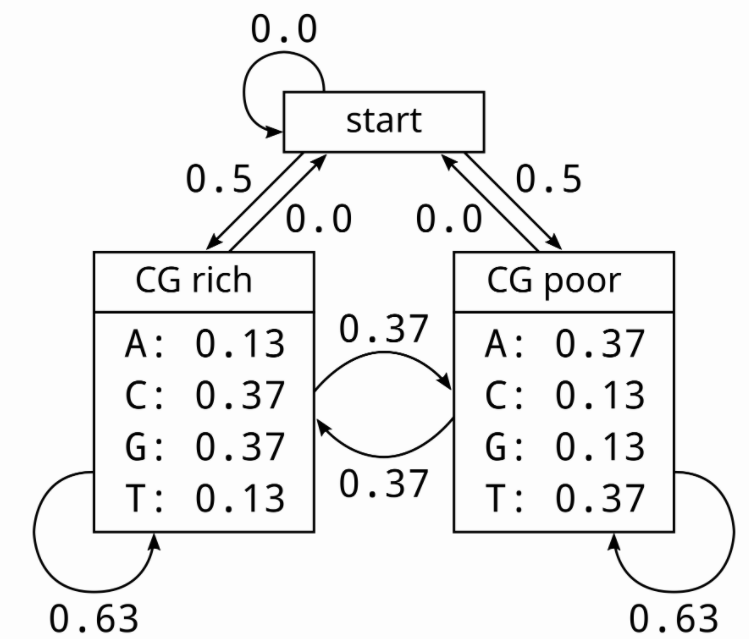

# Islas CpG

Islas CpG (o islas CG) son las regiones con una alta frecuencia de sitios CpG. Aunque las definiciones objetivas para las islas CpG son limitados, la definición formal usual es una región con al menos 200 pb , un porcentaje de GC superior a 50%, y una relación de CpG observado-a-esperada mayor que 60%.
* Gardiner-Garden & Frommer 1987 (length ≥ 200 bp, ObsCpG/ExpCpG ≥ 0.6, and %GC ≥ 50%).
*  Takai & Jones 2002 (length ≥ 500 bp, ObsCpG/ExpCpG ≥ 0.65, and %GC ≥ 55%).


In [4]:
obs = ('A', 'C', 'G', 'T')
states = ('B/E', 'A+', 'C+', 'G+', 'T+', 'A-', 'C-', 'G-', 'T-')
start_p = {'B/E': 0.1, 'A+': 0.1, 'C+': 0.2, 'G+': 0.2, 'T+': 0.2, 'A-': 0.05, 'C-': 0.05, 'G-': 0.05, 'T-': 0.05}
trans_p = {
   'B/E' : {'B/E': 0, 'A+': 0.725193, 'C+': 0.1637630, 'G+': 0.1788242, 'T+': 0.0754545,'A-': 0.1322050, 'C-': 0.1267006, 'G-': 0.1226380, 'T-': 0.1278950},
   'A+' : {'B/E': 0.001, 'A+': 0.1762237, 'C+': 0.2682517, 'G+': 0.4170629, 'T+': 0.1174825,'A-': 0.1322050, 'C-': 0.1267006, 'G-': 0.1226380, 'T-': 0.1278950},
   'C+' : {'B/E': 0.001, 'A+': 0.1672435, 'C+': 0.3599201, 'G+': 0.2679840, 'T+': 0.1838722,'A-': 0.1322050, 'C-': 0.1267006, 'G-': 0.1226380, 'T-': 0.1278950},
   'G+' : {'B/E': 0.001, 'A+': 0.1576223, 'C+': 0.3318881, 'G+': 0.3671328, 'T+': 0.1223776,'A-': 0.1322050, 'C-': 0.1267006, 'G-': 0.1226380, 'T-': 0.1278950},
   'T+' : {'B/E': 0.001, 'A+': 0.0773426, 'C+': 0.3475514, 'G+': 0.3759440, 'T+': 0.1781818,'A-': 0.1322050, 'C-': 0.1267006, 'G-': 0.1226380, 'T-': 0.1278950},
   'A-' : {'B/E': 0.001, 'A+': 0.0002997, 'C+': 0.0002047, 'G+': 0.0002837, 'T+': 0.0754545,'A-': 0.1322050, 'C-': 0.1267006, 'G-': 0.1226380, 'T-': 0.1278950},
   'C-' : {'B/E': 0.001, 'A+': 0.0003216, 'C+': 0.0002977, 'G+': 0.0000769, 'T+': 0.0754545,'A-': 0.1322050, 'C-': 0.1267006, 'G-': 0.1226380, 'T-': 0.1278950},
   'G-' : {'B/E': 0.001, 'A+': 0.0001768, 'C+': 0.0002387, 'G+': 0.0002917, 'T+': 0.0754545,'A-': 0.1322050, 'C-': 0.1267006, 'G-': 0.1226380, 'T-': 0.1278950},
   'T-' : {'B/E': 0.001, 'A+': 0.0002477, 'C+': 0.0002457, 'G+': 0.0002977, 'T+': 0.0754545,'A-': 0.1322050, 'C-': 0.1267006, 'G-': 0.1226380, 'T-': 0.1278950}
   }
emit_p = {
   'B/E' : {'A': 0, 'C': 0, 'G': 0, 'T': 0},
   'A+' : {'A': 1, 'C': 0, 'G': 0, 'T': 0},
   'C+' : {'A': 0, 'C': 1, 'G': 0, 'T': 0},
   'G+' : {'A': 0, 'C': 0, 'G': 1, 'T': 0},
   'T+' : {'A': 0, 'C': 0, 'G': 0, 'T': 1},
   'A-' : {'A': 1, 'C': 0, 'G': 0, 'T': 0},
   'C-' : {'A': 0, 'C': 1, 'G': 0, 'T': 0},
   'G-' : {'A': 0, 'C': 0, 'G': 1, 'T': 0},
   'T-' : {'A': 0, 'C': 0, 'G': 0, 'T': 1}
   }

def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0][st] = {"prob": start_p[st] * emit_p[st][obs[0]], "prev": None}
    # Run Viterbi when t > 0
    for t in range(1, len(obs)):
        V.append({})
        for st in states:
            max_tr_prob = V[t-1][states[0]]["prob"]*trans_p[states[0]][st]
            prev_st_selected = states[0]
            for prev_st in states[1:]:
                tr_prob = V[t-1][prev_st]["prob"]*trans_p[prev_st][st]
                if tr_prob > max_tr_prob:
                    max_tr_prob = tr_prob
                    prev_st_selected = prev_st
                    
            max_prob = max_tr_prob * emit_p[st][obs[t]]
            V[t][st] = {"prob": max_prob, "prev": prev_st_selected}
                    
    for line in dptable(V):
        print (line)
    
    opt = []
    max_prob = 0.0
    previous = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] > max_prob:
            max_prob = data["prob"]
            best_st = st
    opt.append(best_st)
    previous = best_st
    
    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1][previous]["prev"])
        previous = V[t + 1][previous]["prev"]

    print ('The steps of states are ' + ' '.join(opt) + ' with highest probability of %s' % max_prob)

def dptable(V):
    # Print a table of steps from dictionary
    yield " ".join(("%12d" % i) for i in range(len(V)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%f" % v[state]["prob"]) for v in V)
        


def example():
    return viterbi(obs,
                    states,
                    start_p,
                    trans_p,
                    emit_p
                )


print(example())



           0            1            2            3
B/E: 0.00000 0.00000 0.00000 0.00000
A+: 0.10000 0.00000 0.00000 0.00000
C+: 0.00000 0.02682 0.00000 0.00000
G+: 0.00000 0.00000 0.00718 0.00000
T+: 0.00000 0.00000 0.00000 0.00088
A-: 0.05000 0.00000 0.00000 0.00000
C-: 0.00000 0.01267 0.00000 0.00000
G-: 0.00000 0.00000 0.00329 0.00000
T-: 0.00000 0.00000 0.00000 0.00091
The steps of states are A+ C+ G+ T- with highest probability of 0.0009194008785143255
None


* HMM GENERADOR

In [5]:
# https://www.cs.rice.edu/~ogilvie/comp571/2018/09/25/viterbi-algorithm.html
import numpy

neginf = float("-inf")

nucleotide_alphabet = "ACGT" # The alphabet of the nucleotide sites
state_alphabet = "SHL" # The alphabet of the states (start, CG High, CG Low)

# The emissions probability matrix. The rows correspond to the three states
# (start, CG-rich, CG-poor). The columns and the probability of emitting
# [A, C, G, T] conditional on the state.
emission_probs = numpy.array([
	[0.00, 0.00, 0.00, 0.00],
	[0.13, 0.37, 0.37, 0.13],
	[0.37, 0.13, 0.13, 0.37]
])

# The transition probabilities matrix. The rows correspond to the state at
# site i - 1, and the columns correspond to the probability of each state at
# site i
transition_probs = numpy.array([
	[0.00, 0.50, 0.50],
	[0.00, 0.63, 0.37],
	[0.00, 0.37, 0.63]
])

emission_log_probs = numpy.log(emission_probs)
transition_log_probs = numpy.log(transition_probs)

sequence = "GCGGCCGATATACTACAGTTGGCTTGAATGAACCAGGCCCGGCGCGGACAACCTGGGCCCCGGCGGTCGCCCATACCGCAATGGGAGCCGTTAACTCGCT"
#sequence = Cadena1
length = len(sequence) + 1 # the length of the Viterbi matrix

v_matrix = numpy.zeros((length, 3)) # log-probabilities
p_matrix = numpy.zeros((length, 3), dtype = "int8") # pointers

v_matrix.fill(neginf)
p_matrix.fill(-1)

v_matrix[0][0] = 0.0

for i in range(1, length):
	nucleotide = nucleotide_alphabet.index(sequence[i - 1])
	for j in range(3):
		for k in range(3):
			vij = emission_log_probs[j][nucleotide] + v_matrix[i - 1][k] + transition_log_probs[k][j]
			# print(i, j, k, emission_log_probs[j][nucleotide], v_matrix[i - 1][k], transition_log_probs[k][j], vij)
			if vij > v_matrix[i][j]:
				v_matrix[i][j] = vij
				p_matrix[i][j] = k

next_map_k = numpy.argmax(v_matrix[length - 1])
map_states = ""
for i in reversed(range(1, length)):
	map_states = state_alphabet[next_map_k] + map_states
	next_map_k = p_matrix[i][next_map_k]

print(map_states)
print(sequence)

HHHHHHHLLLLLLLLLLLLLHHHLLLLLLLLLHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHHHHHHLLLHHHHLLLHHHHHHHHLLLLHHHHHL
GCGGCCGATATACTACAGTTGGCTTGAATGAACCAGGCCCGGCGCGGACAACCTGGGCCCCGGCGGTCGCCCATACCGCAATGGGAGCCGTTAACTCGCT


<ipython-input-5-5a74e3d2044d>:27: RuntimeWarning: divide by zero encountered in log
  emission_log_probs = numpy.log(emission_probs)
<ipython-input-5-5a74e3d2044d>:28: RuntimeWarning: divide by zero encountered in log
  transition_log_probs = numpy.log(transition_probs)


In [ ]:
Entrenamiento HMM

In [6]:
# https://github.com/thierrygrimm/CpGIslandHMM/blob/master/Jupyter%20Notebooks/CpG%20islands%20Hidden%20Markov%20Model.ipynb
    
from matplotlib.patches import Rectangle
import re
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Matrices de 0
transitions = np.zeros((2, 2))  # +- / +-
emissions = np.zeros((4, 2))  # +- / ACTG
initiations = np.zeros((1, 2))  # +- / Probability

sequences = pd.read_csv('Sequences_CpG.txt', header=None)[0]
keys = pd.read_csv('Annotations_CpG.txt', header=None)[0]
keys_ohe = [x.replace('+', "1").replace('-', "0") for x in keys]  # binary
totals = [60278, 29119]

# Transition Array
for i in range(2):
    for x in range(2):
        query = str(i)+str(x)
        transitions[i][x] = np.sum(
            [len(re.findall('(?=%s)' % query, keys_ohe[n])) for n in range(len(keys))])/totals[i]

print('Transiciones: - + / - +')
print(transitions)
print('\n')
non_cpgs = [[m.start() for m in re.finditer('0', n)] for n in keys_ohe]
cpgs = [[m.start() for m in re.finditer('1', n)] for n in keys_ohe]

cp_nuc = [[sequences[r][i] for i in cpgs[r]] for r in range(len(sequences))]
non_cp_nuc = [[sequences[r][i] for i in non_cpgs[r]]
              for r in range(len(sequences))]
states = [non_cp_nuc, cp_nuc]
nucs = ['A', 'T', 'G', 'C']
totals2 = [np.sum([len(x) for x in non_cp_nuc]),
           np.sum([len(x) for x in cp_nuc])]

# Emisssion Array
for nuc in range(len(nucs)):
    for state in range(len(states)):
        emissions[nuc][state] = np.sum(
            [n.count(nucs[nuc]) for n in states[state]])/totals2[state]

print('Emisiones: A T G C /- +')
print(emissions)
print('\n')

# Initiation Array (occurence in sequence)
pos = np.sum([int(n[0]) for n in keys_ohe])
initiations = [pos/500, 1-pos/500]

print('Iniciación: - + / Probabilidades')
print(initiations)



Transiciones: - + / - +
[[0.9871429  0.0128571 ]
 [0.02558467 0.97441533]]


Emisiones: A T G C /- +
[[0.25910751 0.14164113]
 [0.26115618 0.14501192]
 [0.24023989 0.35263875]
 [0.23949642 0.36070821]]


Iniciación: - + / Probabilidades
[0.442, 0.558]


In [8]:
def forward(sequence, initmat, a, e):
    states = [0, 1]
    seqlen = len(sequence)
    f = [[0]*seqlen, [0]*seqlen]
    ptr = [[0]*seqlen]
    nucleotide = {"A": 0, "T": 1, "G": 2, "C": 3}
    for k in states:
        f[k][0] = initmat[k]*e[k][nucleotide[sequence[0]]]
    for i in range(1, seqlen):
        for k in states:
            # Suma previa de probs*transitions para cada estado
            f[k][i] = f[states[0]][i-1]*a[states[0]][k]
            # Estado restante
            for l in states[1:]:
                f[k][i] += f[l][i-1]*a[l][k]
            f[k][i] = f[k][i]*e[k][nucleotide[sequence[i]]]
    return f

def backward(sequence, initmat, a, e):

    states = [0, 1]
    seqlen = len(sequence)
    b = [[0]*seqlen, [0]*seqlen]
    nucleotide = {"A": 0, "T": 1, "C": 2, "G": 3}

    for k in states:
        b[k][-1] = 1

    for i in np.arange(seqlen-2, -1, -1):
        # -1 para cambio de índice, -1 para la segunda última columna

        for k in states:
            b[k][i] = b[states[0]][i+1] * a[k][states[0]] * \
                e[states[0]][nucleotide[sequence[i+1]]]

            # Estado restante
            for l in states[1:]:
                b[k][i] += b[l][i+1]*a[k][l]*e[l][nucleotide[sequence[i+1]]]
            b[k][i] = b[k][i]

    start = 0
    for k in states:
        start += b[k][0]*e[k][nucleotide[sequence[0]]]*initmat[k]

    return b

Estados más probables: --------------------------------++++++++++++++++++++++++++++++++--------------------------


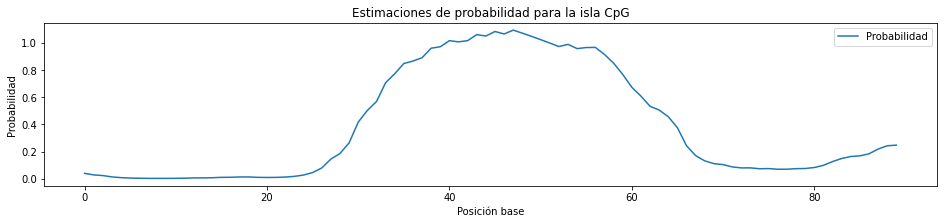

In [9]:
test_sequence="AACAATAATTTTGTTCTCCAATATAATCATCGACGCGTCGCGACGCGCGGGGGCGCCGGGTGACCCTATACTTCACTTGAATGCCATCCG"
#test_sequence = Cadena1

states = [0,1]
start_p = [0.558, 0.442]
trans_p = [[0.9871429, 0.0128571], [0.02558467, 0.97441533]]
emit_p = [[0.25910751, 0.26115618, 0.24023989, 0.23949642],
          [0.14164113, 0.14501192, 0.35263875, 0.36070821]]

f1 = forward(test_sequence, start_p, trans_p, emit_p)
b1 = backward(test_sequence, start_p, trans_p, emit_p)
probs = np.multiply(f1, b1) / np.sum(f1, axis=0)[-1]

island = ["-"]*len(test_sequence)
state=np.argmax(probs,axis=0)
for i in range(len(test_sequence)):
        if state[i]==1: 
            island[i]="+"    
print('Estados más probables: ' + "".join(island))


plt.figure(figsize=(16, 3))
plt.plot(probs[1],  label='Probabilidad')
plt.title('Estimaciones de probabilidad para la isla CpG')
plt.xlabel('Posición base')
plt.ylabel('Probabilidad')
plt.legend(loc='best')
plt.show()

In [1]:
# https://github.com/thierrygrimm/CpGIslandHMM/blob/master/Jupyter%20Notebooks/CpG%20islands%20Hidden%20Markov%20Model.ipynb
    
from matplotlib.patches import Rectangle
import re
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Matrices de 0
transitions = np.zeros((2, 2))  # +- / +-
emissions = np.zeros((4, 2))  # +- / ACTG
initiations = np.zeros((1, 2))  # +- / Probability

sequences = pd.read_csv('Sequences_ORF.txt', header=None)[0]
annotations = pd.read_csv('Annotations_ORF.txt', header=None)[0]
print(len(sequences))
print(len(annotations))
annotations_ohe = [x.replace('+', "1").replace('-', "0") for x in annotations]  # binary
totals = [60278, 29119]

# Transition Array
for i in range(2):
    for x in range(2):
        query = str(i)+str(x)
        transitions[i][x] = np.sum(
            [len(re.findall('(?=%s)' % query, annotations_ohe[n])) for n in range(len(annotations))])/totals[i]

print('Transiciones: - + / - +')
print(transitions)
print('\n')
non_cpgs = [[m.start() for m in re.finditer('0', n)] for n in annotations_ohe]
cpgs = [[m.start() for m in re.finditer('1', n)] for n in annotations_ohe]

cp_nuc = [[sequences[r][i] for i in cpgs[r]] for r in range(len(sequences))]
non_cp_nuc = [[sequences[r][i] for i in non_cpgs[r]]
              for r in range(len(sequences))]
states = [non_cp_nuc, cp_nuc]
nucs = ['A', 'T', 'G', 'C']
totals2 = [np.sum([len(x) for x in non_cp_nuc]),
           np.sum([len(x) for x in cp_nuc])]

# Emisssion Array
for nuc in range(len(nucs)):
    for state in range(len(states)):
        emissions[nuc][state] = np.sum(
            [n.count(nucs[nuc]) for n in states[state]])/totals2[state]

print('Emisiones: A T G C /- +')
print(emissions)
print('\n')

# Initiation Array (occurence in sequence)
pos = np.sum([int(n[0]) for n in annotations_ohe])
initiations = [pos/500, 1-pos/500]

print('Iniciación: - + / Probabilidades')
print(initiations)



11
11
Transiciones: - + / - +
[[1.04582103e-01 4.97694018e-05]
 [1.03025516e-04 8.18709434e-02]]


Emisiones: A T G C /- +
[[0.39984152 0.29895616]
 [0.29017433 0.21837161]
 [0.14167987 0.2125261 ]
 [0.16830428 0.27014614]]


Iniciación: - + / Probabilidades
[0.016, 0.984]


In [3]:
obs = ('A', 'C', 'G', 'T')
states = ('-','+')
start_p = {0.016, 0.984}

trans_p = { 
    '-': {0: 1.04582103e-01, 1: 4.97694018e-05}, 
    '+': {0 :1.03025516e-04, 1: 8.18709434e-02}
}

emit_p = {
    '1-': {'A': 0.39984152, 'T': 0.29017433, 'G': 0.14167987, 'C': 0.16830428},
    '1+': {'A': 0.29895616, 'T': 0.21837161, 'G': 0.2125261, 'C': 0.27014614}
}
"""
emit_p = {
    '1-': {'A': 0.39984152, 'T': 0.29017433, 'G': 0.14167987, 'C': 0.16830428},
    '1+': {'A': 0.29895616, 'T': 0.21837161, 'G': 0.2125261, 'C': 0.27014614},
    '2-': {'A': 0.39984152, 'T': 0.29017433, 'G': 0.14167987, 'C': 0.16830428},
    '2+': {'A': 0.29895616, 'T': 0.21837161, 'G': 0.2125261, 'C': 0.27014614}
}
"""
def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0][st] = {"prob": start_p[st] * emit_p[st][obs[0]], "prev": None}
    # Run Viterbi when t > 0
    for t in range(1, len(obs)):
        V.append({})
        for st in states:
            max_tr_prob = V[t-1][states[0]]["prob"]*trans_p[states[0]][st]
            prev_st_selected = states[0]
            for prev_st in states[1:]:
                tr_prob = V[t-1][prev_st]["prob"]*trans_p[prev_st][st]
                if tr_prob > max_tr_prob:
                    max_tr_prob = tr_prob
                    prev_st_selected = prev_st
                    
            max_prob = max_tr_prob * emit_p[st][obs[t]]
            V[t][st] = {"prob": max_prob, "prev": prev_st_selected}
                    
    for line in dptable(V):
        print (line)
    
    opt = []
    max_prob = 0.0
    previous = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] > max_prob:
            max_prob = data["prob"]
            best_st = st
    opt.append(best_st)
    previous = best_st
    
    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1][previous]["prev"])
        previous = V[t + 1][previous]["prev"]

    print ('The steps of states are ' + ' '.join(opt) + ' with highest probability of %s' % max_prob)

def dptable(V):
    # Print a table of steps from dictionary
    yield " ".join(("%12d" % i) for i in range(len(V)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%f" % v[state]["prob"]) for v in V)
        


def example():
    return viterbi(obs,
                    states,
                    start_p,
                    trans_p,
                    emit_p
                )


print(example())



TypeError: 'set' object is not subscriptable

<ipython-input-49-c72a0e99ac1d>:14: RuntimeWarning: invalid value encountered in true_divide
  probs = np.multiply(f1, b1) / np.sum(f1, axis=0)[-1]


Estados más probables: ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


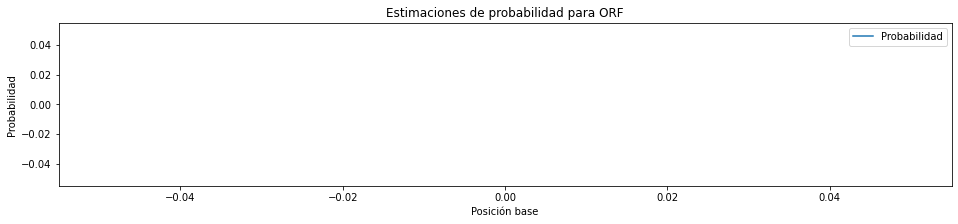

In [49]:
test_sequence="ATGGATTTCAATTTTGATACTGTGACTCCCTGTTCGACCATGTCGTCCTACTATAACTTTAAGATGGCGAG"
#test_sequence = Cadena1

states = [0,1]
start_p = [0.016, 0.984]

trans_p = [[1.04582103e-01, 4.97694018e-05], [1.03025516e-04, 8.18709434e-02]]

emit_p = [[0.39984152, 0.29017433, 0.14167987, 0.16830428],
          [0.29895616, 0.21837161, 0.2125261, 0.27014614]]

f1 = forward(test_sequence, start_p, trans_p, emit_p)
b1 = backward(test_sequence, start_p, trans_p, emit_p)
probs = np.multiply(f1, b1) / np.sum(f1, axis=0)[-1]

orf = ["-"]*len(test_sequence)
state=np.argmax(probs,axis=0)
for i in range(len(test_sequence)):
        if state[i]==1: 
            orf[i]="+"    
print('Estados más probables: ' + "".join(orf))


plt.figure(figsize=(16, 3))
plt.plot(probs[1],  label='Probabilidad')
plt.title('Estimaciones de probabilidad para ORF')
plt.xlabel('Posición base')
plt.ylabel('Probabilidad')
plt.legend(loc='best')
plt.show()